<a href="https://colab.research.google.com/github/shuchimishra/Tensorflow_projects/blob/main/Tensorflow_Code/NLP/exam/Category4_IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ==========================================================================================================
# PROBLEM A4
#
# Build and train a binary classifier for the IMDB review dataset.
# The classifier should have a final layer with 1 neuron activated by sigmoid.
# Do not use lambda layers in your model.
#
# The dataset used in this problem is originally published in http://ai.stanford.edu/~amaas/data/sentiment/
#
# Desired accuracy and validation_accuracy > 83%
# ===========================================================================================================

import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


def solution_A4():
    imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)
    # YOUR CODE HERE
    train_data, test_data = imdb['train'], imdb['test']

    training_sentences = []
    training_labels = []
    testing_sentences = []
    testing_labels = []

    # DO NOT CHANGE THIS CODE
    for s, l in train_data:
        training_sentences.append(s.numpy().decode('utf8'))
        training_labels.append(l.numpy())

    for s, l in test_data:
        testing_sentences.append(s.numpy().decode('utf8'))
        testing_labels.append(l.numpy())

    # YOUR CODE HERE
    training_labels_final = np.array(training_labels)
    testing_labels_final = np.array(testing_labels)

    # DO NOT CHANGE THIS CODE
    # Make sure you used all of these parameters or test may fail
    vocab_size = 10000
    embedding_dim = 16
    max_length = 120
    trunc_type = 'post'
    oov_tok = "<OOV>"

    # Fit your tokenizer with training data
    tokenizer =  Tokenizer(num_words=vocab_size, oov_token=oov_tok)
    tokenizer.fit_on_texts(training_sentences)
    word_index = tokenizer.word_index

    sequences = tokenizer.texts_to_sequences(training_sentences)
    padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)

    testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
    testing_padded = pad_sequences(testing_sequences, maxlen=max_length, truncating=trunc_type)

    model = tf.keras.Sequential([
        # YOUR CODE HERE. Do not change the last layer.
        tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(8, activation = 'relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    model.fit(padded, training_labels_final, epochs=10, validation_data=(testing_padded, testing_labels_final))

    return model


# The code below is to save your model as a .h5 file.
# It will be saved automatically in your Submission folder.
if __name__ == '__main__':
    # DO NOT CHANGE THIS CODE
    model = solution_A4()
    model.save("model_A4.h5")

In [1]:
import json
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import urllib
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)

# YOUR CODE HERE
# Get the train and test sets
train_data, test_data = imdb['train'], imdb['test']

training_sentences = []
training_labels = []
testing_sentences = []
testing_labels = []

# DO NOT CHANGE THIS CODE
# Loop over all training examples and save the sentences and labels
for s, l in train_data:
  training_sentences.append(s.numpy().decode('utf8'))
  training_labels.append(l.numpy())

# Loop over all test examples and save the sentences and labels
for s, l in test_data:

  testing_sentences.append(s.numpy().decode('utf8'))
  testing_labels.append(l.numpy())

# YOUR CODE HERE
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteNR8LEF/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteNR8LEF/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteNR8LEF/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [3]:
# DO NOT CHANGE THIS CODE
# Make sure you used all of these parameters or test may fail
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type = 'post'
oov_tok = "<OOV>"

In [4]:
# Fit your tokenizer with training data
tokenizer =  Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, truncating=trunc_type)

In [5]:
#just clean the sessio, recomendable if we execute some times the model.
tf.keras.backend.clear_session()

In [4]:
# model = tf.keras.Sequential([
#     # YOUR CODE HERE. Do not change the last layer.
#     tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(8, activation = 'relu'),
#     tf.keras.layers.Dense(1, activation='sigmoid')
#     ])

# model.summary()

In [ ]:
# # Parameters
# embedding_dim = 16
# filters = 128
# kernel_size = 5
# dense_dim = 6

# # Model Definition with Conv1D
# model_conv = tf.keras.Sequential([
#     tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
#     tf.keras.layers.Conv1D(filters, kernel_size, activation='relu'),
#     tf.keras.layers.GlobalAveragePooling1D(),
#     tf.keras.layers.Dense(dense_dim, activation='relu'),
#     tf.keras.layers.Dense(1, activation='sigmoid')
# ])

In [17]:
# Parameters
# embedding_dim = 16
lstm_dim_1 = 64
lstm_dim_2 = 32
dense_dim = 16

# Model Definition with LSTM
model_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim_1, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim_2)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [8]:
MCP = tf.keras.callbacks.ModelCheckpoint(filepath='bestmodel.h5', monitor='val_accuracy', mode='auto', save_best_only=True, save_weights_only=False, verbose=1)
RLP = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_accuracy", factor=0.1, patience=3, verbose=1, mode="auto", min_lr=0.000000001) #, cooldown=7, patience=5
ES = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='auto', patience=8, verbose=1) #min_delta=1e-4, #patience=5


In [18]:
model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model_lstm.fit(padded, training_labels_final, epochs=50, validation_data=(testing_padded, testing_labels_final), verbose=1, callbacks=[MCP, RLP, ES])

Epoch 1/50
782/782 [==============================] - ETA: 0s - loss: 0.5504 - accuracy: 0.6866
Epoch 1: val_accuracy did not improve from 0.82920
782/782 [==============================] - 240s 298ms/step - loss: 0.5504 - accuracy: 0.6866 - val_loss: 0.4453 - val_accuracy: 0.8108 - lr: 0.0010
Epoch 2/50
782/782 [==============================] - ETA: 0s - loss: 0.3912 - accuracy: 0.8366
Epoch 2: val_accuracy did not improve from 0.82920
782/782 [==============================] - 272s 347ms/step - loss: 0.3912 - accuracy: 0.8366 - val_loss: 0.4071 - val_accuracy: 0.8175 - lr: 0.0010
Epoch 3/50
782/782 [==============================] - ETA: 0s - loss: 0.2805 - accuracy: 0.8924
Epoch 3: val_accuracy did not improve from 0.82920
782/782 [==============================] - 263s 336ms/step - loss: 0.2805 - accuracy: 0.8924 - val_loss: 0.4051 - val_accuracy: 0.8202 - lr: 0.0010
Epoch 4/50
782/782 [==============================] - ETA: 0s - loss: 0.2339 - accuracy: 0.9123
Epoch 4: val_accura

KeyboardInterrupt: 

In [ ]:
# Plot training results
plot_loss_acc(history)

In [ ]:
# es = EarlyStopping(patience= 8)
# lr = ReduceLROnPlateau(factor = 0.25, patience = 4, verbose = 1)

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model.fit(training_padded, training_labels, epochs = 1000, validation_data=(testing_padded, testing_labels), verbose=1, callbacks=[MCP, RLP, ES]) #callbacks = [es, lr]
print(model.evaluate(testing_padded, testing_labels))

In [19]:
# model.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=0.001060442967229987), metrics=['accuracy'])

# num_epochs = 50
# history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=1, callbacks=[MCP, RLP, ES])

# model.evaluate(testing_padded, testing_labels)

In [7]:
%matplotlib inline
%config InlineBackend.fugure_format = 'retina'
def plot_loss_acc(history):
  #-----------------------------------------------------------
  # Retrieve a list of list results on training and test data
  # sets for each training epoch
  #-----------------------------------------------------------
  acc      = history.history[     'accuracy' ]
  val_acc  = history.history[ 'val_accuracy' ]
  loss     = history.history[    'loss' ]
  val_loss = history.history['val_loss' ]
  epochs   = range(len(acc)) # Get number of epochs
  #------------------------------------------------
  # Plot training and validation accuracy per epoch
  #------------------------------------------------
  plt.plot  ( epochs,     acc, label='Training accuracy' )
  plt.plot  ( epochs, val_acc, label='Validation accuracy' )
  plt.title ('Training and validation accuracy')
  plt.grid()
  plt.legend()
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.figure()
  #------------------------------------------------
  # Plot training and validation loss per epoch
  #------------------------------------------------
  plt.plot  ( epochs,     loss, label='Training loss' )
  plt.plot  ( epochs, val_loss, label='Validation loss' )
  plt.grid()
  plt.legend()
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.title ('Training and validation loss'   )

In [1]:
model = tf.keras.Sequential([
    # YOUR CODE HERE. KEEP THIS OUTPUT LAYER INTACT OR TESTS MAY FAIL
    tf.keras.layers.Embedding(vocab_size, embedding_dim,
                                  input_length=max_length),
    tf.keras.layers.Conv1D(32, 2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling1D(),
    # tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.LSTM(128, activation='tanh', return_sequences=True),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16),
    tf.keras.layers.Dense(1, activation='sigmoid')
    ])

lr = 1.0000e-04
optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

es = EarlyStopping(monitor='val_accuracy', mode='max', patience=10)
lr = ReduceLROnPlateau(monitor='val_accuracy', patience=5, factor=0.1)

# history=model.fit(training, y_train, epochs=10000, batch_size=32, validation_data=(x_test, y_test), callbacks=[lr, es])
# print(model.evaluate(x_test, y_test))
num_epochs=10000
history = model.fit(training_padded, training_labels, epochs=num_epochs,  validation_data=(testing_padded, testing_labels), verbose=1, callbacks=[lr, es]) #callbacks=[MCP, RLP, ES] #batch_size=32,
print(model.evaluate(testing_padded, testing_labels))

NameError: name 'tf' is not defined

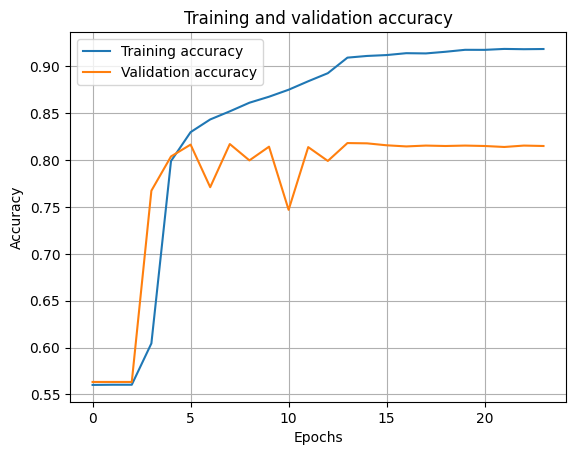

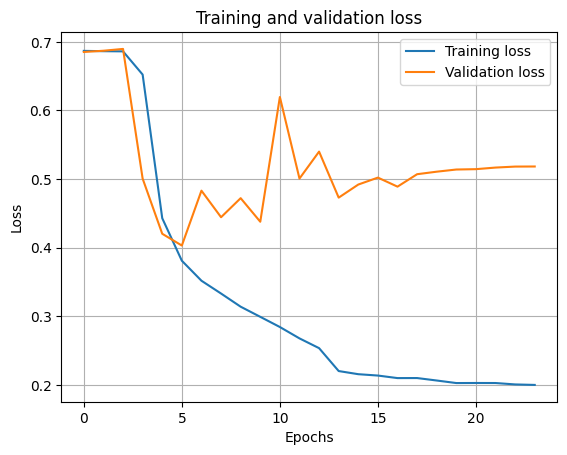

In [30]:
# Plot training results
plot_loss_acc(history)